# 텍스트 및 자연어 빅데이터 분석방법론/  컴퓨터언어학연구 I

## String Similarity
- based on https://itnext.io/string-similarity-the-basic-know-your-algorithms-guide-3de3d7346227
- based on https://www.analyticsvidhya.com/blog/2021/02/a-simple-guide-to-metrics-for-calculating-string-similarity/

## Introduction
- One of the applications of Natural Language Processing is auto-correction and spellings checks. 
- All of us have encountered this that if we type an incorrect or typo in the Google search engine, then the engine automatically corrects it and suggests the right word in its place. 
- How does the engine do that? How does it know what word we wanted to write or ask?

- What is the best string similarity algorithm? Well, it’s quite hard to answer this question, at least without knowing anything else, like what you require it for. And even after having a basic idea, it’s quite hard to pinpoint to a good algorithm without first trying them out on different datasets. 
- It’s a trial and error process.

## Types of algorithms

Based on the properties of operations, string similarity algorithms can be classified into a bunch of domains. Let’s discuss a few of them,

**Edit distance based:** Algorithms falling under this category try to compute the number of operations needed to transforms one string to another. More the number of operations, less is the similarity between the two strings. One point to note, in this case, every index character of the string is given equal importance.

**Token-based:** In this category, the expected input is a set of tokens, rather than complete strings. The idea is to find the similar tokens in both sets. More the number of common tokens, more is the similarity between the sets. A string can be transformed into sets by splitting using a delimiter. This way, we can transform a sentence into tokens of words or n-grams characters. Note, here tokens of different length have equal importance.

**Sequence-based:** Here, the similarity is a factor of common sub-strings between the two strings. The algorithms, try to find the longest sequence which is present in both strings, the more of these sequences found, higher is the similarity score. Note, here combination of characters of same length have equal importance.

## Edit distance based algorithms

Let’s try to understand most widely used algorithms within this type,



### Hamming distance
Hamming Distance, named after the American mathematician, is the simplest algorithm for calculating string similarity. It checks the similarity by comparing **the changes in the number of positions between the two strings.** The method compares each and every letter of one string with the corresponding letter of the other string.

Let’s take these two words: TIME and MINE. Every letter of the two strings will be compared in the following way:

<img src="https://editor.analyticsvidhya.com/uploads/40331time%20mine%20hd.JPG" witdth="60%" align=center>

- The first two letters T and M are different so the number of positions in which the two strings are different is 1 up until now.

- The next two letters ‘I’ are the same, hence the number of positions at which two strings are different is 0.

- Now, the next two letters M and N are again different so the number of positions of two strings being different is 1, and

- The last two letters E are the same so the number of positions of two strings different is 0.

This way the Hamming distance is 2 = 1 + 0 + 1 + 0. It is the total number of positions different between two strings at each character’s place. In short, the number of unequal characters is equal to the Hamming distance.

The Hamming distance can range anywhere between 0 and any integer value, even equal to the length of the string. For this, we can also normalize the value by taking the ratio of the Hamming distance to the length of the string in the following manner:

**Normalized Hamming Distance = Hamming Distance/ length of the string**

**Normalized Hamming distance gives the percentage to which the two strings are dissimilar.** The normalized Hamming distance for the above TIME and MINE example is: 2/4 = 0.50, hence 50% of these two characters are not similar. **A lower value of Normalized Hamming distance means the two strings are more similar.

In [ ]:
import textdistance
print(textdistance.hamming('text', 'test'))
print(textdistance.hamming.normalized_similarity('text', 'test'))
print(textdistance.hamming('arrow', 'arow'))
print(textdistance.hamming.normalized_similarity('arrow', 'arow'))

- As evident, in first example, the two strings vary only at the 3rd position, hence the edit distance is 1. 
- In second example, even though we are only missing one ‘r’, the ‘row’ part is offset by 1, making the edit distance 3 (3rd, 4th and 5th position are dissimilar). 
- One thing to note is the normalized similarity, this is nothing but a function to bound the edit distance between 0 and 1. 
- This signifies, if the score is 0-two strings cannot be more dissimilar, on the other hand, a score of 1 is for a perfect match. 
- So the strings in first example are 75% similar (expected) but in strings in second example are only 40% similar (can we do better?).

### Levenshtein distance
- This distance is computed by finding the number of edits which will transform one string to another. 
- The transformations allowed are insertion — adding a new character, deletion — deleting a character and substitution — replace one character by another. 
- By performing these three operations, the algorithm tries to modify first string to match the second one. In the end we get a edit distance. Examples,

In [ ]:
print(textdistance.levenshtein('arrow', 'arow'))
print(textdistance.levenshtein.normalized_similarity('arrow', 'arow'))

- distance is 1. Similar with hamming distance, we can generate a bounded similarity score between 0 and 1. 
- The similarity score is 80%, huge improvement over the last algorithm.


### Jaro Similarity
<img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-a94c9faafd2fc87f40b299816f9e35a0_l3.svg" witdth="80%" align=center>

where:

    - m is the number of matching characters
    - t is half the number of transpositions
    - where |s1| and |s2| are the lengths of strings s1 and s2 respectively.

The characters are said to be matching if they are the same and the characters are not further than <img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-81e12ffc6a72b15d2ff7a2f7b7ed3db1_l3.svg" witdth="80%"> characters apart.

    - Let s1=”arnab”, s2=”raanb”, so the maximum distance to which each character is matched is 1.
    - It is evident that both the strings have 5 matching characters, but the order is not the same, so the number of characters that are not in order is 4, so the number of transpositions is 2.
    - Therefore, Jaro similarity can be calculated as follows: 
    - Jaro Similarity = (1/3) * $(5/5) + (5/5) + (5-2)/5 } = 0.86667




### Jaro–Winkler Similarity
Jaro–Winkler similarity uses a prefix scale $p$ which gives more favorable ratings to strings that match from the beginning for a set prefix length $l$. Given two strings ${s_{1}}$ and ${s_{2}}$, their Jaro–Winkler similarity ${sim_{w}}$ is:

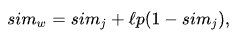

where:

- ${sim_{j}}$ is the Jaro similarity for strings ${s_{1}}$ and ${s_{2}}$
- $l$  is the length of common prefix at the start of the string up to a maximum of 4 characters
- $p$ is a constant scaling factor for how much the score is adjusted upwards for having common prefixes.
- $p$ should not exceed 0.25 (i.e. 1/4, with 4 being the maximum length of the prefix being considered), otherwise the similarity could become larger than 1. 
- The standard value for this constant in Winkler's work is $p=0.1$

The Jaro–Winkler distance ${d_{w}}$ is defined as ${d_{w}=1-sim_{w}}$.


In [ ]:
# if this code is not working, please refer to the texedistance document for external libraries
# https://pypi.org/project/textdistance/   

print(textdistance.jaro_winkler("mes", "messi"))
print(textdistance.jaro_winkler("crate", "crat"))
print(textdistance.jaro_winkler("crate", "atcr"))

In [ ]:
# instead us this code .. Just ignore first external library use 

jaro = textdistance.JaroWinkler(external=False)
print (jaro("mes", "messi"))
jaro = textdistance.JaroWinkler(external=False)
print (jaro("crate", "crat"))
jaro = textdistance.JaroWinkler(external=False)
print (jaro("crate", "atcr"))

- In first case, as the strings were matching from the beginning, high score was provided. 
- Similarly, in the second case, only one character was missing and that too at the end of the string 2, hence a very high score was given. 
- Imagine the previous algorithms, the similarity would have been less, 80% to be exact. 
- In third case, we re-arranged the last two character of string 2, by bringing them at front, which resulted in 0% similarity.

## Token based algorithms
Algorithms falling under this category are more or less, set similarity algorithms, modified to work for the case of string tokens. Some of them are,

### Jaccard index
Falling under the set similarity domain, the formulae is to find the number of common tokens and divide it by the total number of unique tokens. Its expressed in the mathematical terms by,

<img src="https://miro.medium.com/max/325/1*wDOEGSMvUMzHGC45tgLAcw.png" witdth="80%" align=center>

where, the numerator is the intersection (common tokens) and denominator is union (unique tokens). 
- The second case is for when there is some overlap, for which we must remove the common terms as they would add up twice by combining all tokens of both strings. 
- As the required input is tokens instead of complete strings, it falls to user to efficiently and intelligently tokenize his string, depending on the use case. Examples,

In [ ]:
tokens_1 = "hello world".split()
tokens_2 = "world hello".split()
print(textdistance.jaccard(tokens_1 , tokens_2))
tokens_1 = "hello new world".split()
tokens_2 = "hello world".split()
print(textdistance.jaccard(tokens_1 , tokens_2))

We first tokenize the string by default space delimiter, to make words in the strings as tokens. Then we compute the similarity score. In first example, as both words are present in both the strings, the score is 1. Just imagine running an edit based algorithm in this case, the score will be very less if not 0.

### Sorensen-Dice
Falling under set similarity, the logic is to find the common tokens, and divide it by the total number of tokens present by combining both sets. The formulae is,

<img src="https://miro.medium.com/max/158/1*hFlnw58WIUErvL2xPg00BA.png" witdth="80%" align=center>

where, the numerator is twice the intersection of two sets/strings. The idea behind this is if a token is present in both strings, its total count is obviously twice the intersection (which removes duplicates). The denominator is simple combination of all tokens in both strings. Note, its quite different from the jaccard’s denominator, which was union of two strings. As the case with intersection, union too removes duplicates and this is avoided in dice algorithm. Because of this, dice will always overestimate the similarity between two strings. Some example,

In [ ]:
tokens_1 = "hello world".split()
tokens_2 = "world hello".split()
print(textdistance.sorensen(tokens_1 , tokens_2))
tokens_1 = "hello new world".split()
tokens_2 = "hello world".split()
print(textdistance.sorensen(tokens_1 , tokens_2))

## Sequence based algorithm

Lets understand one of the sequence based algorithms,

### Ratcliff-Obershelp similarity

- The idea is quite simple yet intuitive. Find the longest common substring from the two strings.
- Remove that part from both strings, and split at the same location. 
- This breaks the strings into two parts, one left and another to the right of the found common substring. 
- Now take the left part of both strings and call the function again to find the longest common substring. 
- Do this too for the right part. 
- This process is repeated recursively until the size of any broken part is less than a default value. 
- Finally, a formulation similar to the above-mentioned dice is followed to compute the similarity score. 
- The score is twice the number of characters found in common divided by the total number of characters in the two strings. Some examples,

In [ ]:
string1, string2 = "i am going home", "gone home"
print(textdistance.ratcliff_obershelp(string1, string2))
string1, string2 = "helloworld", "worldhello"
print(textdistance.ratcliff_obershelp(string1, string2))
string1, string2 = "test", "text"
print(textdistance.ratcliff_obershelp(string1, string2))
string1, string2 = "mes", "simes"
print(textdistance.ratcliff_obershelp(string1, string2))
string1, string2 = "arrow", "arow"
print(textdistance.ratcliff_obershelp(string1, string2))


In first example, it found ‘ home’ as the longest substring, then considered ‘i am going’ and ‘gone’ for further processing (left of common substring), where again it found ‘go’ as longest substring. Later on right of ‘go’ it also found ’n’ as the only common and longest substring. Overall the score was 2 * (5 + 2 + 1) / 24 ~ 0.66. In second case, it found ‘hello’ as the longest longest substring and nothing common on the left and right, hence score is 0.5. The rest of the examples showcase the advantage of using sequence algorithms for cases missed by edit distance based algorithms.


## Conclusion
The selection of the string similarity algorithm depends on the use case. All of the above-mentioned algorithms, one way or another, try to find the common and non-common parts of the strings and factor them to generate the similarity score. And without complicating the procedure, majority of the use cases can be solved by using one of these algorithms. A little more complicated domains include vector representation and compression types, which also consider the semantic of the words or n-grams. 
